This is an example of the first part of Karine's MAU request, using January 2018 as the month of Hub+ account creation and looking at the first 30 days, 31-60 days and 61-90 days of these users' tenure.

# Load in the Necessary Packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Looking at the first 30 days of behaviour for new registered Hub+ users signing up in January 2018, what percenatge of the January 2018 requests from these new users came from the following two groups: Low Frequency vs. High Volume and High Frequency vs. High Volume?

# Load in the Dataset

In [3]:
data = pd.read_csv('Hub+ Jan 18 Sign-Ups.csv')
data.head()

,viewer_id,frequency,volume,requests
0,93afbc43-ffa0-408b-8d37-46743c76aeaa,3,8.310288,22
1,021707a4-2f07-46c2-a4e8-35c58d057bd0,15,14.422068,48
2,ada2e6c3-d560-4b12-91f4-2b5ad1ad95e5,12,4.670589,25
3,26b3a58d-b7b8-4a35-abb7-f58e69fe7471,23,26.667573,73
4,9f09b078-a4b5-4e6f-a481-9f0db6d68f21,5,3.269528,9


# Clean Up the Data and Remove Outliers

In [4]:
data.dtypes

viewer_id     object
frequency      int64
volume       float64
requests       int64
dtype: object

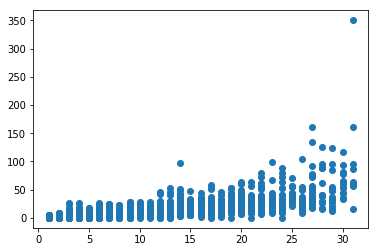

In [5]:
plt.scatter(data['frequency'], data['volume'])

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


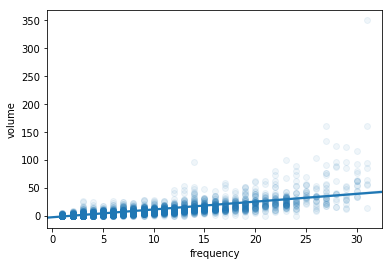

In [6]:
sns.regplot(x = 'frequency', y = 'volume', data = data, scatter_kws = {'alpha': 0.07})

Get rid of outliers that are not possible, e.g. you can not watch more than 24 hours per. day that you were active

In [7]:
data = data.loc[data['volume'] <= data['frequency']*24]

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


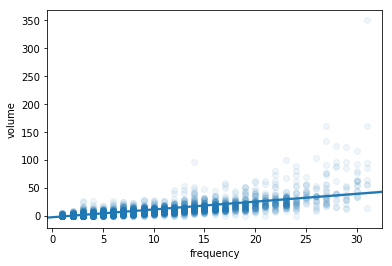

In [8]:
sns.regplot(x = 'frequency', y = 'volume', data = data, scatter_kws = {'alpha': 0.07})

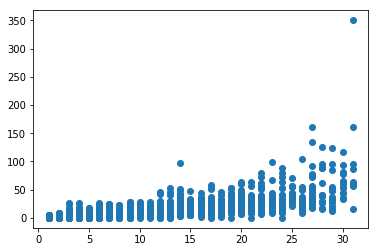

In [9]:
plt.scatter(data['frequency'], data['volume'])

# Find the Sizes of the Low Frequency vs. High Volume and the High Frequency vs. High Volume Groups

In [10]:
data.count()

viewer_id    6137
frequency    6137
volume       6137
requests     6137
dtype: int64

For splitting the frequency into high and low, I have just used the rule that <= 15 days out of 31 is a Low Frequency user and > 15 is a High Frequency user.

In [11]:
data[(data['frequency'] <= 15) & (data['volume'] > 23.88/(31-data['frequency']))].count()

viewer_id    3791
frequency    3791
volume       3791
requests     3791
dtype: int64

In [12]:
data[(data['frequency'] > 15) & (data['volume'] > 23.88/(31-data['frequency']))].count()

viewer_id    597
frequency    597
volume       597
requests     597
dtype: int64

61.77% (3,791 / 6,137) of Jan 2018 Hub+ Sign-Ups belong to this Low-Frequency vs. High-Volume group.

9.73% (597 / 6,137) of Jan 2018 Hub+ Sign-Ups belong to this High-Frequency vs. High-Volume group.

# Calculate the Percentage of the Total 2018 Requests for New Users that Each of These Two Groups Accounted For

In [13]:
data['requests'].sum()

112599

Here the 23.88 figure comes from a previous piece of work done on viewer behaviour. 23.88 hours per. month was the minimum to be considered a super-heavy user.

Using this figure we can find those heavy/high volume users by dividing by their frequency to translate the monthly value to an active daily one.

In [14]:
data_lh = data.loc[(data['frequency'] <= 15) & (data['volume'] > 23.88/(31-data['frequency']))]

In [15]:
data_lh['requests'].sum()

61045

In [16]:
data_hh = data[(data['frequency'] > 15) & (data['volume'] > 23.88/(31-data['frequency']))]

In [17]:
data_hh['requests'].sum()

45143

The Low-Frequency vs. High-Volume sub-group accounted for 54.21% (61,045/112,599) of the total Jan 2018 requests for new users.

The High-Frequency vs. High-Volume sub-group accounted for 40.09% (45,143/112,599) of the total Jan 2018 requests for new users.

# Load in the Breadth of Interest Data for the Jan 18 Sign-Ups

In [18]:
boi = pd.read_csv('Hub+ Jan 18 Sign-Ups BOI.csv')
boi.head()

,viewer_id,boi
0,0a00b35e-11e0-4f4e-94cf-78e7cadd79f3,2
1,c15df41f-1db8-4e95-93f6-ff26023eab18,5
2,20d62de7-ac7f-4481-9fb0-20e67912ce8f,51
3,cceca10f-345c-474f-993d-34cac1f4b648,2
4,1d841b42-666f-47cf-8588-f607d42e197b,1


In [19]:
boi['boi'].mean()

3.126995142262318

# Group By the BOI and Count the Number of Viewers

In [20]:
boi_group = boi.groupby(['boi']).count()
boi_group

,viewer_id
boi,
1,2106
2,1256
3,758
4,485
5,341
6,229
7,150
8,110
9,69


# Plot the BOI Bar Chart

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


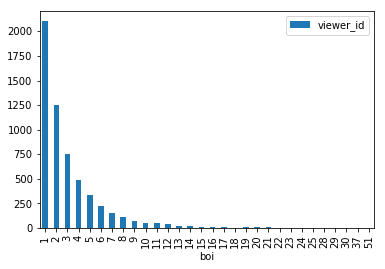

In [21]:
fig = boi_group.plot.bar()
fig.figure.show()

# 31-60 Day Analysis

In [22]:
data_31_60 = pd.read_csv('Jan 18 Hub+ Sign-Ups 31-60 Days.csv')
data_31_60.head()

,viewer_id,frequency,volume,requests
0,21dccf12-437a-4406-a3d5-8918ccd0db4f,2,2.863345,8
1,3b89d330-de61-4b73-be40-19866ecd330e,3,1.444100,7
2,e71af792-0ef9-4d6b-80a8-e30920edcc44,10,10.735956,42
3,602a31c5-c1b4-4baa-8e7b-c3fc11fedf0a,8,6.115641,58
4,f12dfac1-6fdb-4c1d-a6fd-7963f7a0fc46,6,7.666737,19


In [23]:
data_31_60.dtypes

viewer_id     object
frequency      int64
volume       float64
requests       int64
dtype: object

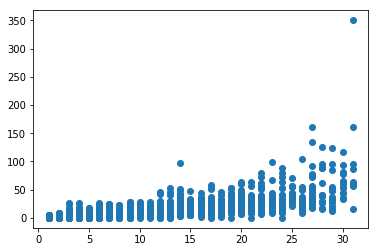

In [24]:
plt.scatter(data['frequency'], data['volume'])

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


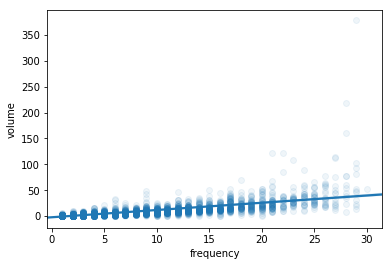

In [25]:
sns.regplot(x = 'frequency', y = 'volume', data = data_31_60, scatter_kws = {'alpha': 0.07})

In [26]:
data = data.loc[data['volume'] <= data['frequency']*24]

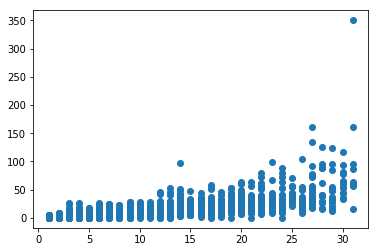

In [27]:
plt.scatter(data['frequency'], data['volume'])

In [28]:
data_31_60.count()

viewer_id    4074
frequency    4074
volume       4074
requests     4074
dtype: int64

In [29]:
data_31_60[(data_31_60['frequency'] <= 15) & (data_31_60['volume'] > 23.88/(31-data_31_60['frequency']))].count()

viewer_id    2693
frequency    2693
volume       2693
requests     2693
dtype: int64

In [30]:
data_31_60[(data_31_60['frequency'] > 15) & (data_31_60['volume'] > 23.88/(31-data_31_60['frequency']))].count()

viewer_id    511
frequency    511
volume       511
requests     511
dtype: int64

66.10% (2,693 / 4,074) of Jan 18 Hub+ Sign-Ups who survived into the 31-60 day range belonged to the Low-Frequency vs. High-Volume Group.

12.54% (511 / 4,074) of Jan 18 Hub+ Sign-Ups who survived into the 31-60 day range belonged to the High-Frequency vs. High-Volume Group.

In [31]:
data_31_60['requests'].sum()

82892

In [32]:
data_lh_31_60 = data_31_60.loc[(data_31_60['frequency'] <= 15) & (data_31_60['volume'] > 23.88/(31-data_31_60['frequency']))]

In [33]:
data_lh_31_60['requests'].sum()

43503

In [34]:
data_hh_31_60 = data_31_60.loc[(data_31_60['frequency'] > 15) & (data_31_60['volume'] > 23.88/(31-data_31_60['frequency']))]

In [35]:
data_hh_31_60['requests'].sum()

36849

The Low-Frequency vs. High-Volume sub-group accounted for 52.48% (43,503 / 82,892) of the total Jan 2018 requests for new users.

The High-Frequency vs. High-Volume sub-group accounted for 44.78% (36,849 / 82,892) of the total Jan 2018 requests for new users.

In [36]:
boi_31_60 = pd.read_csv('Jan 18 Hub+ BOI 31-60.csv')
boi_31_60.head()

,viewer_id,boi
0,3e01feb8-abda-421b-9212-727832d267d7,4
1,fff284ac-d47d-48f1-80e1-2b4896539be5,2
2,6cbf03b4-c0ef-486f-8454-d5c249bc6ae6,24
3,b3170cb5-6c77-4819-b459-1015bfce63f5,2
4,cbb5045c-4aaa-48fc-90df-219b602ffc69,1


In [37]:
boi_31_60['boi'].mean()

3.408599314165128

In [38]:
boi_31_60_group = boi_31_60.groupby(['boi']).count()
boi_31_60_group

,viewer_id
boi,
1,1232
2,790
3,536
4,359
5,222
6,170
7,137
8,88
9,63


C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


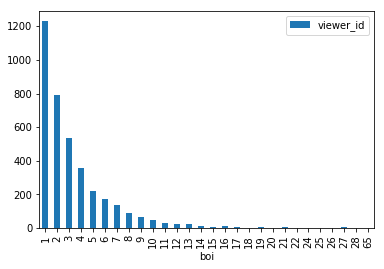

In [39]:
fig = boi_31_60_group.plot.bar()
fig.figure.show()

# 61-90 Day Analysis

In [40]:
data_61_90 = pd.read_csv('Jan 18 Hub+ Sign-Ups 61-90.csv')
data_61_90.head()

,viewer_id,frequency,volume,requests
0,6686ab22-de25-4989-991b-415a1e340c12,10,6.164736,33
1,05c0010f-5ece-4ce9-9141-ea6c0019f722,7,4.232820,16
2,1a9319fa-94f9-4777-91e4-a8fec64a55d7,2,0.934242,3
3,7093b7dc-6c51-4020-a197-97acb3048417,13,50.146248,57
4,6ea261b3-2803-4101-bb4f-0042563ee6c0,19,17.594953,41


In [41]:
data_61_90.dtypes

viewer_id     object
frequency      int64
volume       float64
requests       int64
dtype: object

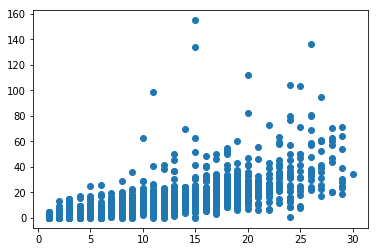

In [42]:
plt.scatter(data_61_90['frequency'], data_61_90['volume'])

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


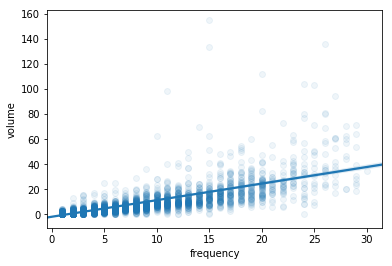

In [43]:
sns.regplot(x = 'frequency', y = 'volume', data = data_61_90, scatter_kws = {'alpha': 0.07})

In [44]:
data = data.loc[data['volume'] <= data['frequency']*24]

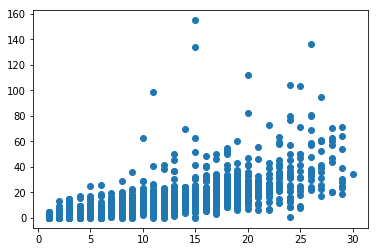

In [45]:
plt.scatter(data_61_90['frequency'], data_61_90['volume'])

In [46]:
data_61_90.count()

viewer_id    3817
frequency    3817
volume       3817
requests     3817
dtype: int64

In [47]:
data_61_90[(data_61_90['frequency'] <= 15) & (data_61_90['volume'] > 23.88/(31-data_61_90['frequency']))].count()

viewer_id    2449
frequency    2449
volume       2449
requests     2449
dtype: int64

In [48]:
data_61_90[(data_61_90['frequency'] > 15) & (data_61_90['volume'] > 23.88/(31-data_61_90['frequency']))].count()

viewer_id    463
frequency    463
volume       463
requests     463
dtype: int64

64.16% (2,449 / 3,817) of Jan 18 Hub+ Sign-Ups who survived into the 31-60 day range belonged to the Low-Frequency vs. High-Volume Group.

12.13% (463 / 3,817) of Jan 18 Hub+ Sign-Ups who survived into the 31-60 day range belonged to the High-Frequency vs. High-Volume Group.

In [49]:
data_61_90['requests'].sum()

73006

In [50]:
data_lh_61_90 = data_61_90.loc[(data_61_90['frequency'] <= 15) & (data_61_90['volume'] > 23.88/(31-data_61_90['frequency']))]

In [51]:
data_lh_61_90['requests'].sum()

38722

In [52]:
data_hh_61_90 = data_61_90.loc[(data_61_90['frequency'] > 15) & (data_61_90['volume'] > 23.88/(31-data_61_90['frequency']))]

In [53]:
data_hh_61_90['requests'].sum()

31825

The Low-Frequency vs. High-Volume sub-group accounted for 53.04% (38,722 / 73,006) of the total Jan 2018 requests for new users.

The High-Frequency vs. High-Volume sub-group accounted for 43.59% (31,825 / 73,006) of the total Jan 2018 requests for new users.

In [54]:
boi_61_90 = pd.read_csv('Jan 18 Hub+ 61-90 BOI.csv')
boi_61_90.head()

,viewer_id,boi
0,aaf90fb1-c411-48b2-9848-d752469b4296,3
1,ccffceea-3c45-4b2c-9b01-6d4189b6a277,6
2,fae7fceb-2a49-402c-9e69-05029bce0d53,4
3,4774bcde-e769-4c16-ab63-b4e395b070f0,14
4,b41c468f-063a-437e-b41e-f1bf81bfeff3,2


In [55]:
boi_61_90['boi'].mean()

3.343312814773363

In [56]:
boi_61_90_group = boi_61_90.groupby(['boi']).count()
boi_61_90_group

,viewer_id
boi,
1,1192
2,734
3,488
4,345
5,203
6,156
7,124
8,95
9,65


C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


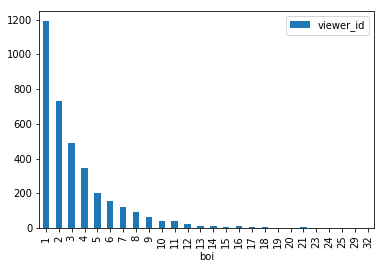

In [57]:
fig = boi_61_90_group.plot.bar()
fig.figure.show()

# Look at Theses Users Created Month and Re-Do the Frequency Volume Analysis

In [58]:
created = pd.read_csv('Jan 18 Hub+ Created Month.csv')
created.head()

,viewer_id,frequency,volume,requests
0,94b115da-106c-456c-b69e-60bfe9332b20,1,0.404294,2
1,2d7a6365-25c0-46a0-96df-9fb8adb8cdad,3,2.436232,5
2,49cb9275-7f5e-4946-b380-fd270c64ccba,4,2.223993,6
3,6d9ff79b-6a1f-4a65-a096-50afa9253329,1,0.005588,1
4,277eb066-89e4-400b-9e38-4fe76f084c5e,1,1.009722,1


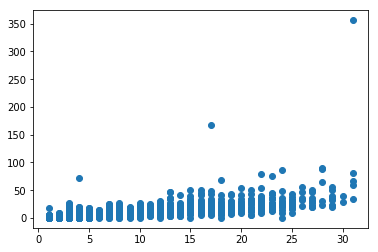

In [63]:
plt.scatter(created['frequency'], created['volume'])

In [66]:
created = created.loc[created['volume'] <= created['frequency']*24]

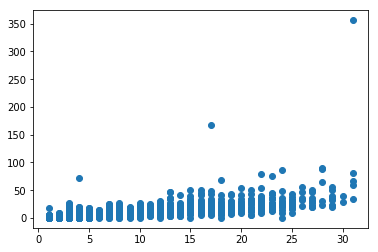

In [67]:
plt.scatter(created['frequency'], created['volume'])

In [68]:
created.count()

viewer_id    6319
frequency    6319
volume       6319
requests     6319
dtype: int64

In [59]:
created_lf = created.loc[(created['frequency'] <= 15) & (created['volume'] > 23.88/(31-created['frequency']))]

In [60]:
created_lf.count()

viewer_id    3685
frequency    3685
volume       3685
requests     3685
dtype: int64

In [61]:
created_hf = created.loc[(created['frequency'] > 15) & (created['volume'] > 23.88/(31-created['frequency']))]

In [62]:
created_hf.count()

viewer_id    288
frequency    288
volume       288
requests     288
dtype: int64

58.32% (3,685 / 6,319) of Jan 18 Hub+ Sign-Ups belonged to the Low-Frequency vs. High-Volume Group in their first month of Hub tenure.

4.56% (288 / 6,319) of Jan 18 Hub+ Sign-Ups belonged to the High-Frequency vs. High-Volume Group in their first month of Hub tenure.

In [70]:
created['requests'].sum()

77375

In [69]:
created_lf['requests'].sum()

49133

In [71]:
created_hf['requests'].sum()

21342

The Low-Frequency vs. High-Volume sub-group accounted for 63.50% (49,133 / 77,375) of the total Jan 2018 requests for new users.

The High-Frequency vs. High-Volume sub-group accounted for 27.58% (21,342 / 77,375) of the total Jan 2018 requests for new users.

In [72]:
created_boi = pd.read_csv('Jan 18 Hub+ Created BOI.csv')
created_boi.head()

,viewer_id,boi
0,52b0f751-1454-4127-a6bc-bfa29bf8d8ce,1
1,925b965b-757b-4cd1-ba0e-353e9986ab6a,3
2,df7c74bb-812a-43c0-a369-fedf9b2646dd,2
3,b00cddba-60e8-4119-98ae-174820268616,4
4,7160054d-dd95-4818-9b31-f85a691b38ab,2


In [73]:
created_boi['boi'].mean()

2.2103174603174605

In [75]:
created_boi_group = created_boi.groupby('boi').count()
created_boi_group

,viewer_id
boi,
1,2730
2,1059
3,488
4,290
5,162
6,87
7,68
8,35
9,30


C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


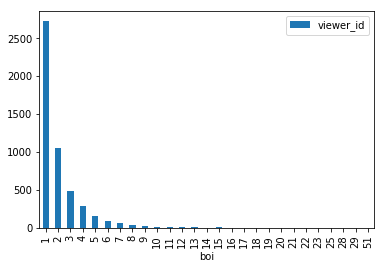

In [76]:
fig = created_boi_group.plot.bar()
fig.figure.show()